In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Loading the test data in memory
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X1*** and ***Product Size*** = ***Large*** and ***Sourcing Channel*** != ***WHOLESALE***

In [3]:
# Loading the training data in memory
df = pd.read_csv("/content/drive/MyDrive/Maersk/x1_large_oth_channel_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,Oct-20,134.28
1,Oct-20,133.45
2,Oct-20,134.28
3,Oct-20,133.45
4,Oct-20,133.45


In [4]:
# Converting the Month of Sourcing data from strinf to datetime format for training
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2020-10-25,134.28
1,2020-10-25,133.45
2,2020-10-25,134.28
3,2020-10-25,133.45
4,2020-10-25,133.45


In [5]:
# Ordering the training data by Month of Sourcing (oldest to newest)
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
143408,2020-07-25,136.26
140948,2020-07-25,136.47
140947,2020-07-25,132.00
140946,2020-07-25,137.64
140945,2020-07-25,136.57
...,...,...
153725,2021-05-25,156.73
153726,2021-05-25,154.24
153727,2021-05-25,157.92
153713,2021-05-25,158.53


(0.0, 500.0)

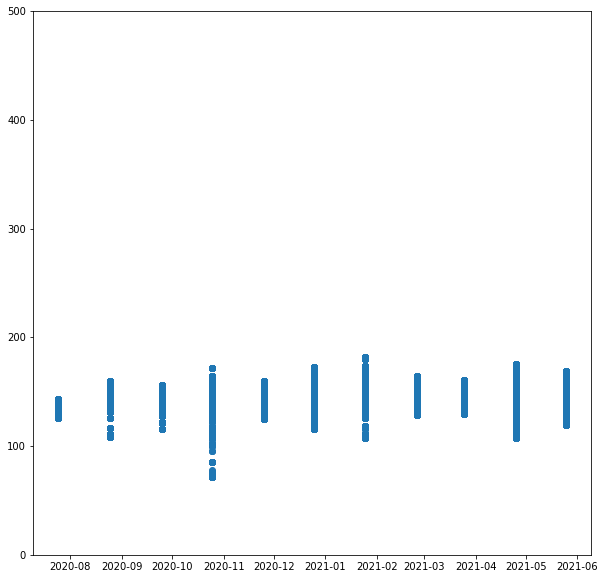

In [6]:
# Plottting the training data to visualize the scatter plot of the grouped time-series
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,500))

In [7]:
# renaming the columns to symbolize the timestamp and the target
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [8]:
# instantiating an object of Prophet Class (Using the Prophet Forecasting model developed by Facebook)
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# Making prediction on the filtered data
test_df = test_df[(test_df["Manufacturer"]=="X1") & (test_df["Product Size"]=="Large") & (test_df["Sourcing Channel"]!="WHOLESALE") ]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)

   ProductType Manufacturer Area Code  ...         ds       y        yhat
0         NTM1           X1       A10  ... 2021-06-25  155.75  143.606489
1         NTM1           X1       A10  ... 2021-06-25  143.02  143.606489
2         NTM1           X1       A11  ... 2021-06-25  139.39  143.606489
3         NTM1           X1        A2  ... 2021-06-25  169.42  143.606489
4         NTM1           X1        A3  ... 2021-06-25  125.51  143.606489
5         NTM1           X1        A3  ... 2021-06-25  157.27  143.606489
6         NTM1           X1       A33  ... 2021-06-25  133.83  143.606489
7         NTM1           X1        A4  ... 2021-06-25  140.40  143.606489
8         NTM1           X1        A6  ... 2021-06-25  135.40  143.606489
9         NTM1           X1        A7  ... 2021-06-25  116.25  143.606489
10        NTM1           X1        A7  ... 2021-06-25  171.26  143.606489
11        NTM1           X1        A7  ... 2021-06-25  141.14  143.606489
12        NTM1           X1        A8 

In [10]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

   ProductType Manufacturer Area Code  ...       y        yhat Absolute Error
0         NTM1           X1       A10  ...  155.75  143.606489      12.143511
1         NTM1           X1       A10  ...  143.02  143.606489       0.586489
2         NTM1           X1       A11  ...  139.39  143.606489       4.216489
3         NTM1           X1        A2  ...  169.42  143.606489      25.813511
4         NTM1           X1        A3  ...  125.51  143.606489      18.096489
5         NTM1           X1        A3  ...  157.27  143.606489      13.663511
6         NTM1           X1       A33  ...  133.83  143.606489       9.776489
7         NTM1           X1        A4  ...  140.40  143.606489       3.206489
8         NTM1           X1        A6  ...  135.40  143.606489       8.206489
9         NTM1           X1        A7  ...  116.25  143.606489      27.356489
10        NTM1           X1        A7  ...  171.26  143.606489      27.653511
11        NTM1           X1        A7  ...  141.14  143.606489  

In [11]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  28.141363870672265
